In [6]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 


In [7]:
df=pd.read_csv("C:\\Users\Haider Ali\Downloads\winequality-red.csv")
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [8]:
df.info

<bound method DataFrame.info of       fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067

In [9]:
X = df.drop('quality', axis=1)  # Assuming 'quality' is the target variable
y = df['quality']

In [10]:
mean = np.mean(df['quality'])
std = np.std(df['quality'])
# Step 4: Calculate the Z-Score
df['Z-Score'] = (df['quality'] - mean) / std
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Z-Score
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,-0.787823
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,-0.787823
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,-0.787823
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,0.450848
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,-0.787823


In [11]:
# Step 5: Print the data
print("----------------------------------------")
print(f"Here is the df with outliers:\n {df}")
print("----------------------------------------")
# Step 6: Print the outliers
print(f"Here are the outliers based on the z-score threshold, 3:\n {df[df['Z-Score'] > 1]}")
print("----------------------------------------")


----------------------------------------
Here is the df with outliers:
       fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310

In [12]:
# Remove outliers
data = [df[i] for i, label in enumerate(df) if label == 0]
print("Data without outliers:", df)

Data without outliers:       fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

    

In [17]:
# load and fit the knn classifier  on the data 
from sklearn.neighbors import KNeighborsClassifier
knn =KNeighborsClassifier(n_neighbors=11)
knn.fit(X,y)
#  predict the species for  new  set of measurements
new_measurement=np.array([[5.1,3.5,1.4,0.2,3.1,5.1,3.5,1.4,0.2,3.1,2.8]])
knn.predict(new_measurement)

c:\Users\Public\anaconda3\envs\python_ml\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array([4], dtype=int64)

In [18]:
# train test split the data 
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test =train_test_split(X,y,test_size=0.2,random_state=42)

In [19]:
knn.fit(x_train,y_train)
y_pred=knn.predict(x_test)

[[ 0  0  1  0  0  0]
 [ 0  1  4  5  0  0]
 [ 0  0 87 39  4  0]
 [ 0  0 66 59  7  0]
 [ 0  0 20 17  5  0]
 [ 0  0  1  4  0  0]]
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       1.00      0.10      0.18        10
           5       0.49      0.67      0.56       130
           6       0.48      0.45      0.46       132
           7       0.31      0.12      0.17        42
           8       0.00      0.00      0.00         5

    accuracy                           0.47       320
   macro avg       0.38      0.22      0.23       320
weighted avg       0.47      0.47      0.45       320



c:\Users\Public\anaconda3\envs\python_ml\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Public\anaconda3\envs\python_ml\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Public\anaconda3\envs\python_ml\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(r

Text(50.722222222222214, 0.5, 'true')

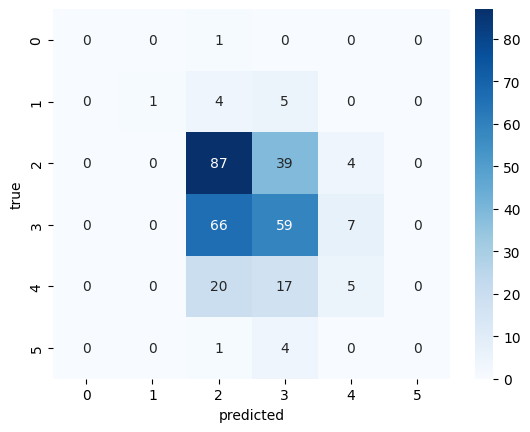

In [24]:
# evaluate the model by metrics
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
# plot the confusion_matrix 
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,cmap='Blues')
plt.xlabel('predicted')
plt.ylabel('true')